<a href="https://colab.research.google.com/github/vishalbh/DeepLearningProjects/blob/master/Cifar10ImageClassiification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install keras_utils

  Created wheel for keras-utils: filename=keras_utils-1.0.13-cp36-none-any.whl size=2657 sha256=529c2ee502666c45dbed4b74d05ae6256ae61fdd8921083b6dbb1f52e89c55f3
  Stored in directory: /root/.cache/pip/wheels/46/25/27/7707005c1cb27e1ffc8277b004ac295e34767b02b44d73d6be
Successfully built keras-utils


In [0]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import keras_utils
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
tf.reset_default_graph()
# s=tf.Session()
# s.close()

In [0]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test)=cifar10.load_data()

In [0]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.4,random_state=101)

In [11]:
print(x_train.shape,x_val.shape,x_test.shape,y_train.shape,y_val.shape,y_test.shape)

(30000, 32, 32, 3) (20000, 32, 32, 3) (10000, 32, 32, 3) (30000, 1) (20000, 1) (10000, 1)


In [0]:
num_classes=10
cifar10_classes=["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

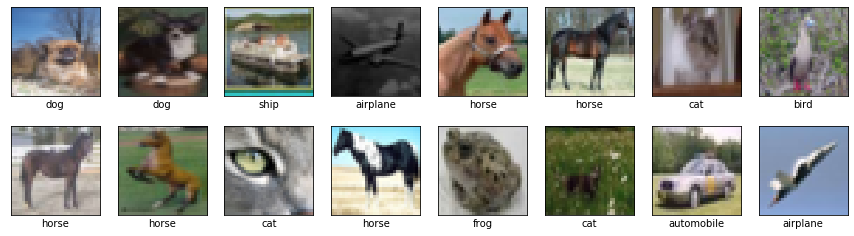

In [13]:
plt.figure(figsize=(15,4))
for i in range(16):
  random_index=np.random.randint(0,len(y_train))
  plt.subplot(2,8,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[random_index,:])
  plt.xlabel(cifar10_classes[y_train[random_index][0]])
plt.show()

In [0]:
x_train2=x_train/255-0.5
x_val2=x_val/255-0.5
x_test2=x_test/255-0.5

y_train2=keras.utils.to_categorical(y_train,num_classes)
y_val2=keras.utils.to_categorical(y_val,num_classes)
y_test2=keras.utils.to_categorical(y_test,num_classes)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [0]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding="same",input_shape=(32,32,3)))
model.add(LeakyReLU(0.1))
model.add(Conv2D(32,(3,3),padding="same"))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(16,(3,3),padding="same"))
model.add(LeakyReLU(0.1))
model.add(Conv2D(32,(3,3),padding="same"))
model.add(LeakyReLU(0.1))
model.add(Conv2D(64,(3,3),padding="same"))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 16)       

In [0]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.adamax(lr=5e-3),
    metrics=['accuracy']
)

In [29]:
model.fit(
    x_train2,y_train2,
    epochs=10,
    callbacks=[keras.callbacks.LearningRateScheduler(lambda epoch:5e-3*0.9**epoch)],
    validation_data=(x_val2,y_val2),
    shuffle=True,
    verbose=1
)

Train on 30000 samples, validate on 20000 samples
Epoch 1/10
30000/30000 [==============================] - 156s 5ms/step - loss: 1.5747 - acc: 0.4322 - val_loss: 1.2605 - val_acc: 0.5423
Epoch 2/10
30000/30000 [==============================] - 154s 5ms/step - loss: 1.1723 - acc: 0.5843 - val_loss: 1.1054 - val_acc: 0.6028
Epoch 3/10
30000/30000 [==============================] - 156s 5ms/step - loss: 1.0067 - acc: 0.6466 - val_loss: 0.9254 - val_acc: 0.6738
Epoch 4/10
30000/30000 [==============================] - 156s 5ms/step - loss: 0.8978 - acc: 0.6869 - val_loss: 0.8496 - val_acc: 0.7010
Epoch 5/10
30000/30000 [==============================] - 155s 5ms/step - loss: 0.8218 - acc: 0.7149 - val_loss: 0.8514 - val_acc: 0.7036
Epoch 6/10
30000/30000 [==============================] - 156s 5ms/step - loss: 0.7646 - acc: 0.7335 - val_loss: 0.7798 - val_acc: 0.7265
Epoch 7/10
30000/30000 [==============================] - 154s 5ms/step - loss: 0.7129 - acc: 0.7536 - val_loss: 0.7645 - 

In [30]:
model.evaluate(x_test2,y_test2,1)

10000/10000 [==============================] - 33s 3ms/step


[0.7462844176375882, 0.7467]